In [101]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from nltk.stem import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shloakgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
df = pd.read_csv("HW4_yelp_sentiment.csv")
print(df.shape)

(988, 2)


In [103]:
df.head()

,reviews,sentiment
0,Wow... Loved this place.,p
1,Crust is not good.,n
2,Not tasty and the texture was just nasty.,n
3,Stopped by during the late May bank holiday of...,p
4,The selection on the menu was great and so wer...,p


### We are using tf-idf vectorizer to change text to feature
### Removing Stop-words
### Using both uni-grams and bi-grams as input features

In [105]:
X_train = df.reviews
vect = TfidfVectorizer(stop_words = stop_words, ngram_range =(1,2), min_df = 2, lowercase=True)
vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [93]:
X_train_trans_tfidf = vect.transform(X_train)

## Document Term Matrix

In [94]:
dtm = pd.DataFrame(X_train_trans_tfidf.toarray(), columns=vect.get_feature_names())
#dtm.to_csv('Document Term Matrix.csv')

In [95]:
dtm.head()

,10,10 minutes,100,12,20,20 minutes,30,30 min,30 minutes,35,...,wow,wrap,wrong,year,years,years ago,yet,yummy,zero,zero stars
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.572012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_coefficients(classifier, feature_names, top_features=15):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red'if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

## Logistic Regression

/Users/shloakgupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shloakgupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature Importance


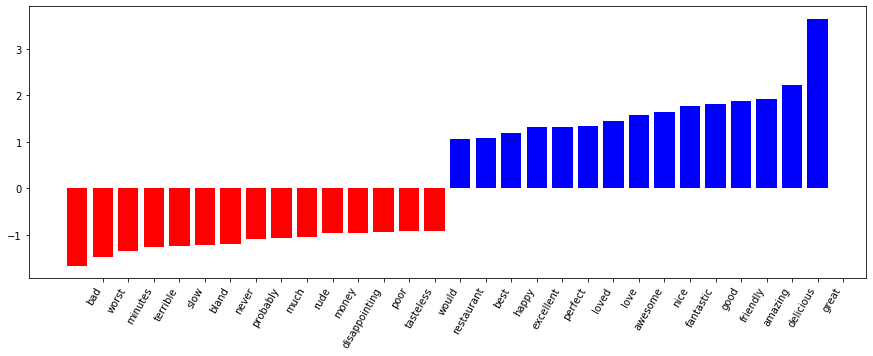

Precision = 0.8078602620087336 Recall =  0.7489878542510121 F1 = 0.7773109243697478
True Negative = 406 False Positive = 88 False Negative = 124 True Positive =  370
Accuracy = 0.7854251012145749


In [97]:
logisticRegr = LogisticRegression(class_weight= 'balanced', penalty= 'l2')
logisticRegr.fit(X_train_trans_tfidf, df.sentiment)
prediction = cross_val_predict(logisticRegr, X_train_trans_tfidf, df.sentiment,cv=5)
p,r,f1,x = precision_recall_fscore_support(df.sentiment, prediction, average='binary',pos_label='p')

print("Feature Importance")
plot_coefficients(logisticRegr, vect.get_feature_names())
print("Precision =",p,"Recall = ",r,"F1 =", f1) 
tn,fp,fn,tp = confusion_matrix(df.sentiment,prediction).ravel()
print("True Negative =",tn,"False Positive =",fp,"False Negative =", fn,"True Positive = ",tp)
print('Accuracy = ' + str((tn + tp)/(tn + tp + fn + fp)))

## Support Vector Machine 

In [98]:
orc = LinearSVC(max_iter=5000, penalty= 'l2',class_weight= 'balanced')

In [99]:
orc.fit(X_train_trans_tfidf, df.sentiment)
prediction = cross_val_predict(orc, X_train_trans_tfidf, df.sentiment,cv=5)

Feature Importance


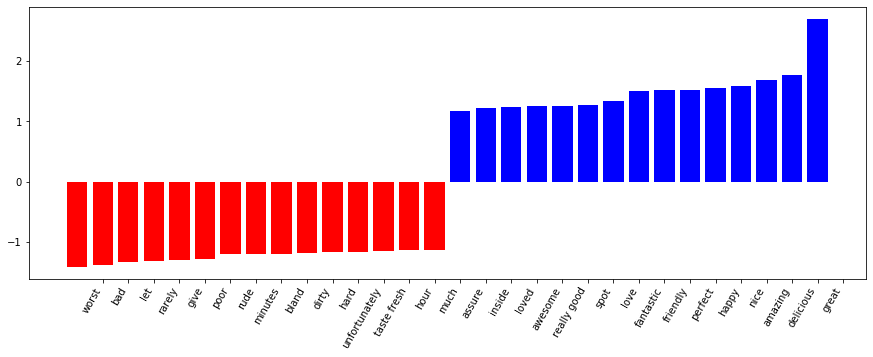

Precision = 0.7791666666666667 Recall =  0.757085020242915 F1 = 0.7679671457905545
True Negative = 388 False Positive = 106 False Negative = 120 True Positive =  374
Accuracy = 0.771255060728745


In [100]:
p,r,f1,x = precision_recall_fscore_support(df.sentiment, prediction, average='binary',pos_label='p')

print("Feature Importance")
plot_coefficients(orc, vect.get_feature_names())
print("Precision =",p,"Recall = ",r,"F1 =", f1) 
tn,fp,fn,tp = confusion_matrix(df.sentiment,prediction).ravel()
print("True Negative =",tn,"False Positive =",fp,"False Negative =", fn,"True Positive = ",tp)
print('Accuracy = ' + str((tn + tp)/(tn + tp + fn + fp)))

#### Support Vector Machines are a good fit for text classification because SVM can handle large feature space very Efficiently

## Neural Networks

### Optimizer = Adam, Activation Function = ReLU, Hidden Layers = 4

In [88]:

nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes = (128, 128, 64, 8),
                   activation = 'relu',learning_rate='adaptive',random_state=1, max_iter = 1500)


nn.fit(X_train_trans_tfidf, df.sentiment)
prediction = cross_val_predict(nn, X_train_trans_tfidf, df.sentiment,cv=5)
p,r,f1,x = precision_recall_fscore_support(df.sentiment, prediction, average='binary',pos_label='p')

print("Precision =",p,"Recall = ",r,"F1 =", f1) 
tn,fp,fn,tp = confusion_matrix(df.sentiment,prediction).ravel()
print("True Negative =",tn,"False Positive =",fp,"False Negative =", fn,"True Positive = ",tp)
print('Accuracy = ' + str((tn + tp)/(tn + tp + fn + fp)))

precision = 0.7294776119402985 Recall =  0.791497975708502 F1 = 0.7592233009708738
True Negative = 349 False Positive = 145 False Negative = 103 True Positive =  391
Accuracy = 0.7489878542510121


### Logistic Regression Runs the fastest and has best Accuracy
### If data is more the i think neural networks would overperform logistic regression